In [101]:
import os, sys
sys.path.append(os.path.dirname(os.path.abspath("./")))
from quantata.ratio import calc_ma, calc_macd, calc_macd_oscillator, calc_macd_signal, calc_ema
from quantata.backtest import calc_signal, simulate, calc_asset, calc_return

In [102]:
import pandas as pd
import seaborn as sns
import yfinance as yf
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

In [103]:
df = yf.Ticker("^KS11").history(period="1y")
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2021-08-19 to 2022-08-19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          245 non-null    float64
 1   High          245 non-null    float64
 2   Low           245 non-null    float64
 3   Close         245 non-null    float64
 4   Volume        245 non-null    int64  
 5   Dividends     245 non-null    int64  
 6   Stock Splits  245 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 15.3 KB


In [104]:
df["MA"] = calc_ma(df.Close, 3)
df["EMA"] = calc_ema(df.Close, 3)
df["MACD"] = calc_macd(df.Close, 12, 26)
df["MACDSignal"] = calc_macd_signal(df.Close, 12, 26, 9)
df["MACDOscillator"] = calc_macd_oscillator(df.Close, 12, 26, 9)

In [105]:
df_new = df[["MACD", "MACDSignal", "MACDOscillator"]].stack().reset_index()
df_new.columns = ["Date", "RatioName", "Ratio"]

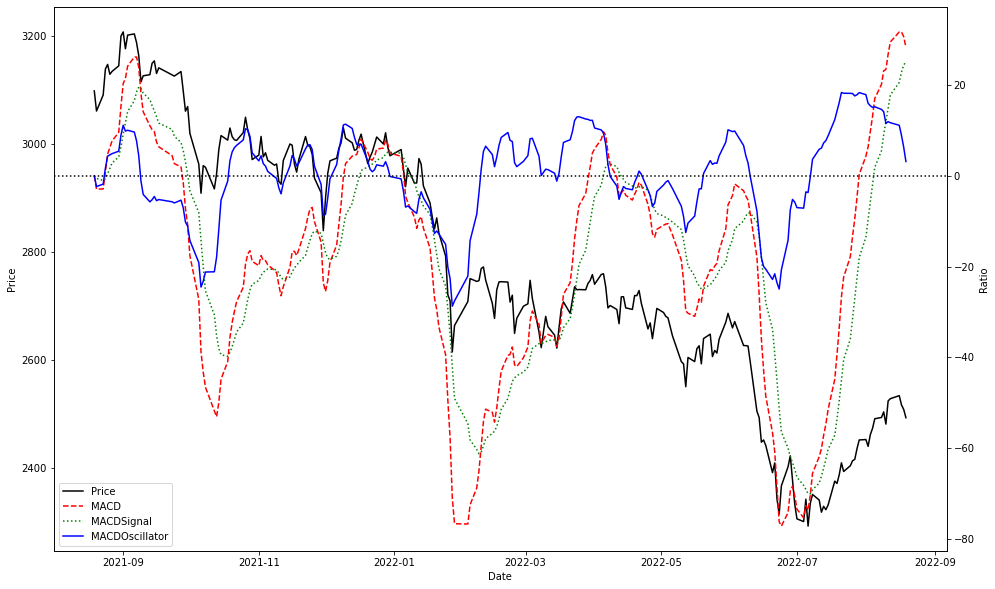

In [106]:
plt.subplots(figsize=(16, 10))
ax1 = sns.lineplot(data=df, x="Date", y="Close", legend=False, color="k")
ax1.ticklabel_format(useOffset=False, style="plain", axis="y")
plt.ylabel("Price")
ax2 = ax1.twinx()
sns.lineplot(
    data=df_new, x="Date", y="Ratio", hue="RatioName", legend=False,
    palette={"MACD": "r", "MACDSignal": "g", "MACDOscillator": "b"}, ax=ax2
)
ax2.axhline(y=0, color='k', linestyle=":")
ax2.lines[0].set_linestyle("--")
ax2.lines[1].set_linestyle(":")
ax2.ticklabel_format(useOffset=False, style="plain", axis="y")
plt.legend(handles=[
    Line2D([0], [0], label="Price", color="k"),
    Line2D([0], [0], label="MACD", color="r", linestyle="--"),
    Line2D([0], [0], label="MACDSignal", color="g", linestyle=":"),
    Line2D([0], [0], label="MACDOscillator", color="b"),
    ])

In [107]:
df["Signal"] = calc_signal(df["MACDOscillator"], 0, 0)
df["Amount"], df["Volume_"], df["Fee"], df["Position"], df["Capital"] = simulate(df.Close, df.Signal, False, 10_000_000)
df["Asset"] = calc_asset(df.Close, df.Position, df.Capital)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA,EMA,MACD,MACDSignal,MACDOscillator,Signal,Amount,Volume_,Fee,Position,Capital,Asset
Date,,,,,,,,,,,,,,,,,,,
2021-08-19,3140.010010,3158.000000,3097.830078,3097.830078,655600,0,0,3097.830078,3097.830078,0.000000,0.000000,0.000000,0,-0.000000,0,0,0,1.000000e+07,1.000000e+07
2021-08-20,3111.100098,3122.090088,3049.030029,3060.510010,672100,0,0,3060.510010,3079.170044,-2.977099,-0.595420,-2.381680,-2,-0.000000,0,0,0,1.000000e+07,1.000000e+07
2021-08-23,3086.810059,3111.810059,3064.649902,3090.209961,570400,0,0,3082.850016,3084.690002,-2.906431,-1.057622,-1.848809,-1,-0.000000,0,0,0,1.000000e+07,1.000000e+07
2021-08-24,3119.699951,3142.580078,3115.229980,3138.300049,586500,0,0,3096.340007,3111.495026,1.018304,-0.642437,1.660741,16,50212.800781,16,51,16,9.949736e+06,9.999949e+06
2021-08-25,3148.129883,3161.000000,3124.250000,3146.810059,600400,0,0,3125.106689,3129.152542,4.760496,0.438150,4.322346,43,135312.832520,43,136,59,9.814287e+06,9.999949e+06


In [108]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA,EMA,MACD,MACDSignal,MACDOscillator,Signal,Amount,Volume_,Fee,Position,Capital,Asset
count,245.000000,245.000000,245.000000,245.000000,2.450000e+02,245.0,245.0,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,2.450000e+02,2.450000e+02
mean,2774.844084,2788.596125,2755.443845,2771.411017,6.423127e+05,0.0,0.0,2773.758528,2773.836606,-18.696823,-19.106788,0.409965,37.685714,40583.881192,13.567347,59.975510,2444.265306,2.584704e+06,9.151688e+06
std,243.828005,243.826333,242.956719,243.072041,2.183581e+05,0.0,0.0,242.383254,242.135838,25.834756,22.793370,9.870673,54.571235,95640.622762,32.407506,85.126999,1052.710778,3.114286e+06,6.914323e+05
min,2308.969971,2318.310059,2276.629883,2292.010010,2.955000e+05,0.0,0.0,2311.376709,2310.643403,-77.097731,-70.007713,-28.725250,-29.000000,-75820.209717,-29.000000,0.000000,0.000000,7.992534e+02,7.670632e+06
25%,2621.750000,2641.820068,2605.810059,2621.530029,4.950000e+05,0.0,0.0,2625.976644,2626.822162,-35.570288,-35.244279,-5.220051,-5.000000,-13102.199707,-5.000000,0.000000,1513.000000,4.225511e+04,8.751903e+06
50%,2729.860107,2746.620117,2712.870117,2735.050049,5.954000e+05,0.0,0.0,2733.536702,2730.273175,-16.488958,-17.226691,1.984554,20.000000,0.000000,0.000000,21.000000,2948.000000,1.054117e+06,9.126198e+06
75%,2995.580078,3001.699951,2973.239990,2984.479980,7.492000e+05,0.0,0.0,2986.726644,2987.076094,0.287798,-1.223602,7.325556,74.000000,70536.148682,24.000000,72.000000,3324.000000,5.299587e+06,9.813725e+06
max,3200.070068,3215.129883,3186.790039,3207.020020,1.735700e+06,0.0,0.0,3197.270020,3197.382889,31.638001,25.110358,18.311488,185.000000,359186.242188,115.000000,360.000000,3336.000000,1.000000e+07,1.001416e+07


<AxesSubplot:xlabel='Date', ylabel='Asset'>

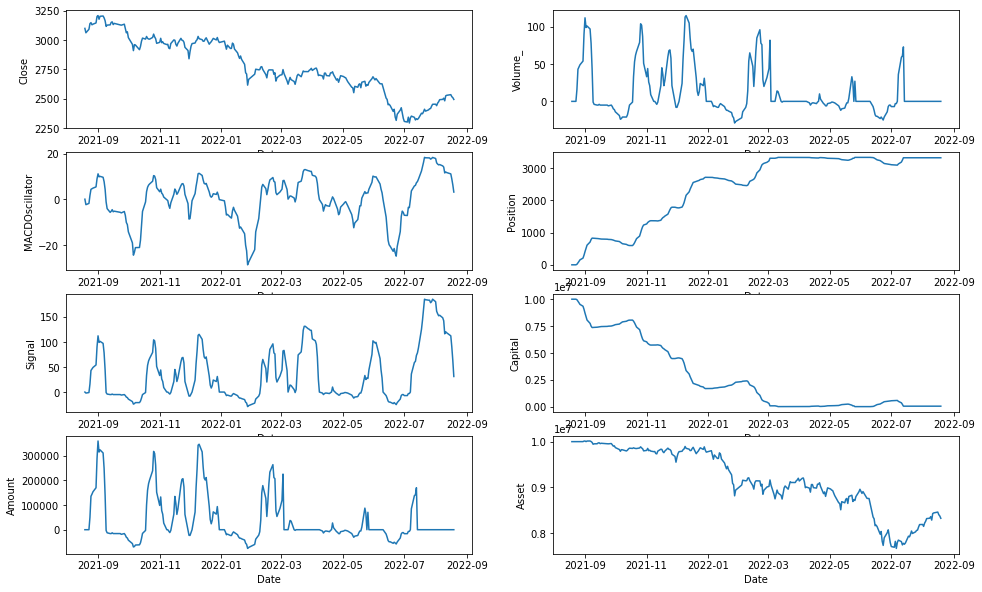

In [109]:
_, axes = plt.subplots(4, 2, figsize=(16, 10))
sns.lineplot(data=df, x="Date", y="Close", ax=axes[0][0])
sns.lineplot(data=df, x="Date", y="MACDOscillator", ax=axes[1][0])
sns.lineplot(data=df, x="Date", y="Signal", ax=axes[2][0])
sns.lineplot(data=df, x="Date", y="Amount", ax=axes[3][0])
sns.lineplot(data=df, x="Date", y="Volume_", ax=axes[0][1])
sns.lineplot(data=df, x="Date", y="Position", ax=axes[1][1])
sns.lineplot(data=df, x="Date", y="Capital", ax=axes[2][1])
sns.lineplot(data=df, x="Date", y="Asset", ax=axes[3][1])

In [110]:
print(calc_return(df["Asset"]))

-0.16720435268554687
